In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
class_name = ['T-shirt/top', 'Trouser', 'Pollover', 'Dress', 'Coat', 'Sandel', 'Shirt', 'Sneakers', 'Bag', 'Ankleboot']

In [4]:
df1 = pd.read_csv("fashion-mnist_train.csv")
df2 = pd.read_csv("fashion-mnist_test.csv")

In [10]:
x_train = df1.drop("label", axis = 1).values
y_train = df1["label"].values
x_train.shape

(60000, 784)

In [9]:
x_test = df2.drop("label", axis = 1).values
y_test = df2["label"].values

In [12]:
x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(10000, 28, 28)

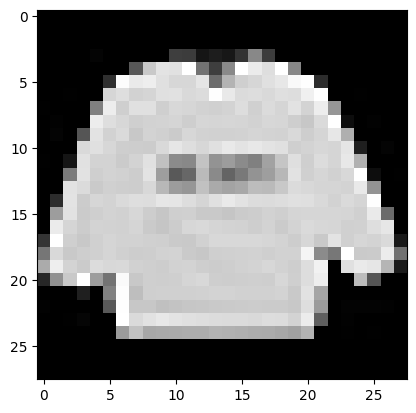

In [14]:
plt.imshow(x_train[0],cmap='gray')

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28,1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [18]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation= 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

C:\Users\karan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(x_train, y_train, epochs= 5, validation_data= (x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8517 - loss: 0.4108 - val_accuracy: 0.8876 - val_loss: 0.3048
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8911 - loss: 0.2933 - val_accuracy: 0.9085 - val_loss: 0.2558
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9080 - loss: 0.2471 - val_accuracy: 0.9141 - val_loss: 0.2367
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9224 - loss: 0.2080 - val_accuracy: 0.9190 - val_loss: 0.2274
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9325 - loss: 0.1821 - val_accuracy: 0.9134 - val_loss: 0.2482


In [21]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [22]:
import numpy as np
index = 10
print(predictions[index])
final_value = np.argmax(predictions[index])
print("Actual: ",y_test[index])
print("Predicted: ", final_value)
print("Class Label: ", class_name[final_value])

[4.7384343e-05 9.6328711e-07 5.1730308e-06 9.9968004e-01 1.7685151e-04
 8.7791037e-09 8.9506029e-05 4.4935317e-10 4.8611923e-08 8.7430557e-10]
Actual:  3
Predicted:  3
Class Label:  Dress


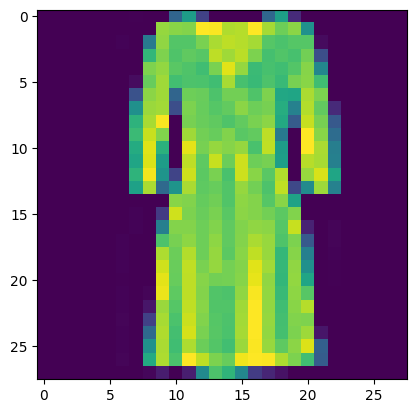

In [23]:
plt.imshow(x_test[index])

In [25]:
loss, accuracy = model.evaluate(x_test,y_test)
print("Loss : ", loss)
print("Accuracy: ", accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9064 - loss: 0.2652
Loss :  0.24823977053165436
Accuracy:  91.33999943733215
